In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('ESCOLA_ESTADUAL.csv')
df = df.drop(['FILO', 'CIE', 'GEO POL', 'FILO SOC', 'BIO TEC', 'SOC', 'LID', 'PROG', 'TEC INO', 'ING IF', 'ARTE', 'EMPR', 'ORA',
              'OE PORT', 'QUI APL', 'OE PORT', 'OE MAT'], axis=1)
df = df[0:7]
df

,Turmas,Total Alunos,(%) de Participação,(%) de Acertos,Evolução,PORT,MAT,HIST,GEO,ING,ED FIN,FÍS,QUI,BIO
0,1ª SERIE G INTEGRAL 9H ANUAL - 40320251,40.0,93.8%,65.2%,0.12,64.5%,56.4%,66.1%,71.4%,0.0%,75.7%,69.5%,64.9%,73.3%
1,1ª SERIE E INTEGRAL 9H ANUAL - 40112287,41.0,98.8%,61.6%,0.10,64.3%,56.4%,60.7%,64.0%,0.0%,79.6%,56.8%,55.6%,71.3%
2,1ª SERIE F INTEGRAL 9H ANUAL - 40112282,44.0,98.9%,53.1%,0.01,51.4%,50.0%,54.5%,52.0%,0.0%,69.8%,50.5%,46.8%,64.5%
3,1ª SERIE D INTEGRAL 9H ANUAL - 40112286,43.0,91.9%,52.0%,0.13,50.3%,46.6%,56.4%,58.0%,0.0%,59.2%,49.3%,50.3%,58.1%
4,1ª SERIE B INTEGRAL 9H ANUAL - 40112288,40.0,97.5%,48.0%,-0.01,52.6%,38.3%,52.9%,60.3%,0.0%,67.1%,35.2%,40.1%,47.4%
5,1ª SERIE C INTEGRAL 9H ANUAL - 40112289,40.0,95.0%,47.7%,-0.02,50.7%,33.1%,54.6%,53.6%,0.0%,68.9%,41.0%,39.8%,53.6%
6,1ª SERIE A INTEGRAL 9H ANUAL - 40112285,42.0,97.6%,45.6%,-0.04,51.7%,32.9%,47.9%,56.4%,0.0%,71.5%,35.2%,33.5%,52.7%


In [3]:
# Remover o símbolo '%' e converter para float
for col in ['MAT', 'FÍS', 'QUI', 'BIO', 'ED FIN', 'GEO', 'PORT', 'ING']:
    df[col] = df[col].str.replace('%', '').astype(float)

In [4]:
df.columns

Index(['Turmas', 'Total Alunos', '(%) de Participação', '(%) de Acertos',
       'Evolução', 'PORT', 'MAT', 'HIST', 'GEO', 'ING', 'ED FIN', 'FÍS', 'QUI',
       'BIO'],
      dtype='object')

In [5]:
sala = ['1G', '1E', '1F', '1D', '1B', '1C', '1A']

df['Turmas'] = sala
df

,Turmas,Total Alunos,(%) de Participação,(%) de Acertos,Evolução,PORT,MAT,HIST,GEO,ING,ED FIN,FÍS,QUI,BIO
0,1G,40.0,93.8%,65.2%,0.12,64.5,56.4,66.1%,71.4,0.0,75.7,69.5,64.9,73.3
1,1E,41.0,98.8%,61.6%,0.10,64.3,56.4,60.7%,64.0,0.0,79.6,56.8,55.6,71.3
2,1F,44.0,98.9%,53.1%,0.01,51.4,50.0,54.5%,52.0,0.0,69.8,50.5,46.8,64.5
3,1D,43.0,91.9%,52.0%,0.13,50.3,46.6,56.4%,58.0,0.0,59.2,49.3,50.3,58.1
4,1B,40.0,97.5%,48.0%,-0.01,52.6,38.3,52.9%,60.3,0.0,67.1,35.2,40.1,47.4
5,1C,40.0,95.0%,47.7%,-0.02,50.7,33.1,54.6%,53.6,0.0,68.9,41.0,39.8,53.6
6,1A,42.0,97.6%,45.6%,-0.04,51.7,32.9,47.9%,56.4,0.0,71.5,35.2,33.5,52.7


In [6]:
df = df[['Turmas', 'MAT', 'FÍS', 'QUI', 'BIO', 'ED FIN', 'GEO', 'PORT']]
df[0:7]

,Turmas,MAT,FÍS,QUI,BIO,ED FIN,GEO,PORT
0,1G,56.4,69.5,64.9,73.3,75.7,71.4,64.5
1,1E,56.4,56.8,55.6,71.3,79.6,64.0,64.3
2,1F,50.0,50.5,46.8,64.5,69.8,52.0,51.4
3,1D,46.6,49.3,50.3,58.1,59.2,58.0,50.3
4,1B,38.3,35.2,40.1,47.4,67.1,60.3,52.6
5,1C,33.1,41.0,39.8,53.6,68.9,53.6,50.7
6,1A,32.9,35.2,33.5,52.7,71.5,56.4,51.7


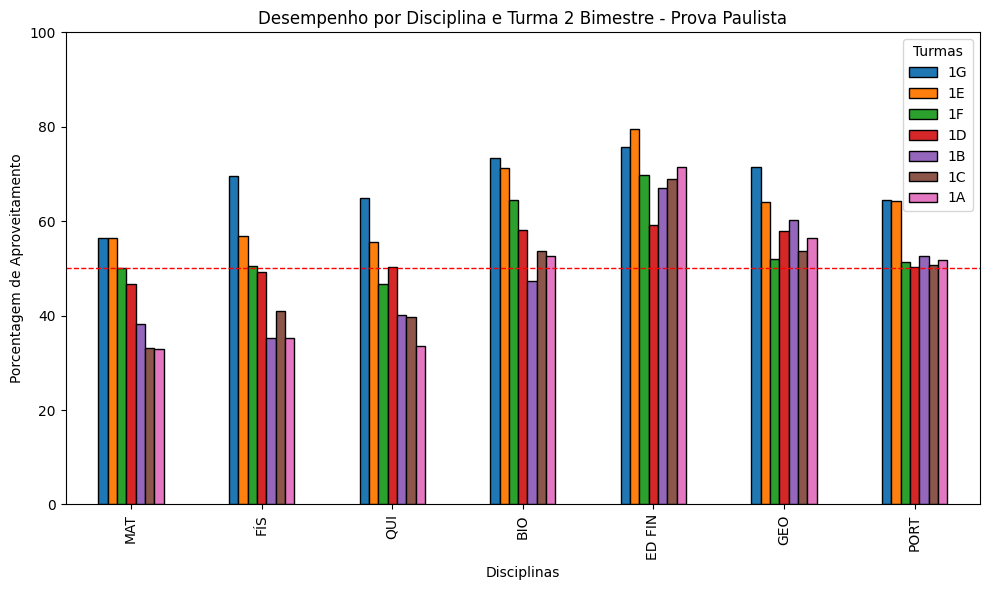

In [7]:
# Transpor para colocar disciplinas no eixo X
df_plot = df.set_index('Turmas').T

# Plotar gráfico de barras
df_plot.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.ylabel('Porcentagem de Aproveitamento')
plt.xlabel('Disciplinas')
plt.title('Desempenho por Disciplina e Turma 2 Bimestre - Prova Paulista')
plt.ylim(0, 100)
#plt.grid(axis='y')
plt.legend(title='Turmas')
plt.axhline(y=50, color='red', linestyle='--', linewidth=1, label=f'Referência: {50}%')
plt.tight_layout()
plt.show()
